In [1]:
df = read.csv("train.csv")
head(df)

battery_power blue clock_speed dual_sim fc four_g int_memory m_dep mobile_wt
1  842          0    2.2         0         1 0       7         0.6   188      
2 1021          1    0.5         1         0 1      53         0.7   136      
3  563          1    0.5         1         2 1      41         0.9   145      
4  615          1    2.5         0         0 0      10         0.8   131      
5 1821          1    1.2         0        13 1      44         0.6   141      
6 1859          0    0.5         1         3 0      22         0.7   164      
  n_cores ... px_height px_width ram  sc_h sc_w talk_time three_g touch_screen
1 2       ...   20       756     2549  9   7    19        0       0           
2 3       ...  905      1988     2631 17   3     7        1       1           
3 5       ... 1263      1716     2603 11   2     9        1       1           
4 6       ... 1216      1786     2769 16   8    11        1       0           
5 2       ... 1208      1212     1411  8   2    15        1       1           
6 1       ... 1004      1654     1067 17   1    10        1       0           
  wifi price_range
1 1    1          
2 0    2          
3 0    2          
4 0    2          
5 0    1          
6 0    1

In [2]:
str(df)

'data.frame':	2000 obs. of  21 variables:
 $ battery_power: int  842 1021 563 615 1821 1859 1821 1954 1445 509 ...
 $ blue         : int  0 1 1 1 1 0 0 0 1 1 ...
 $ clock_speed  : num  2.2 0.5 0.5 2.5 1.2 0.5 1.7 0.5 0.5 0.6 ...
 $ dual_sim     : int  0 1 1 0 0 1 0 1 0 1 ...
 $ fc           : int  1 0 2 0 13 3 4 0 0 2 ...
 $ four_g       : int  0 1 1 0 1 0 1 0 0 1 ...
 $ int_memory   : int  7 53 41 10 44 22 10 24 53 9 ...
 $ m_dep        : num  0.6 0.7 0.9 0.8 0.6 0.7 0.8 0.8 0.7 0.1 ...
 $ mobile_wt    : int  188 136 145 131 141 164 139 187 174 93 ...
 $ n_cores      : int  2 3 5 6 2 1 8 4 7 5 ...
 $ pc           : int  2 6 6 9 14 7 10 0 14 15 ...
 $ px_height    : int  20 905 1263 1216 1208 1004 381 512 386 1137 ...
 $ px_width     : int  756 1988 1716 1786 1212 1654 1018 1149 836 1224 ...
 $ ram          : int  2549 2631 2603 2769 1411 1067 3220 700 1099 513 ...
 $ sc_h         : int  9 17 11 16 8 17 13 16 17 19 ...
 $ sc_w         : int  7 3 2 8 2 1 8 3 1 10 ...
 $ talk_time    : i

In [3]:
summary(df)

 battery_power         blue        clock_speed       dual_sim     
 Min.   : 501.0   Min.   :0.000   Min.   :0.500   Min.   :0.0000  
 1st Qu.: 851.8   1st Qu.:0.000   1st Qu.:0.700   1st Qu.:0.0000  
 Median :1226.0   Median :0.000   Median :1.500   Median :1.0000  
 Mean   :1238.5   Mean   :0.495   Mean   :1.522   Mean   :0.5095  
 3rd Qu.:1615.2   3rd Qu.:1.000   3rd Qu.:2.200   3rd Qu.:1.0000  
 Max.   :1998.0   Max.   :1.000   Max.   :3.000   Max.   :1.0000  
       fc             four_g         int_memory        m_dep       
 Min.   : 0.000   Min.   :0.0000   Min.   : 2.00   Min.   :0.1000  
 1st Qu.: 1.000   1st Qu.:0.0000   1st Qu.:16.00   1st Qu.:0.2000  
 Median : 3.000   Median :1.0000   Median :32.00   Median :0.5000  
 Mean   : 4.309   Mean   :0.5215   Mean   :32.05   Mean   :0.5018  
 3rd Qu.: 7.000   3rd Qu.:1.0000   3rd Qu.:48.00   3rd Qu.:0.8000  
 Max.   :19.000   Max.   :1.0000   Max.   :64.00   Max.   :1.0000  
   mobile_wt        n_cores            pc           px_

In [4]:
any(is.na(df))

[1] FALSE

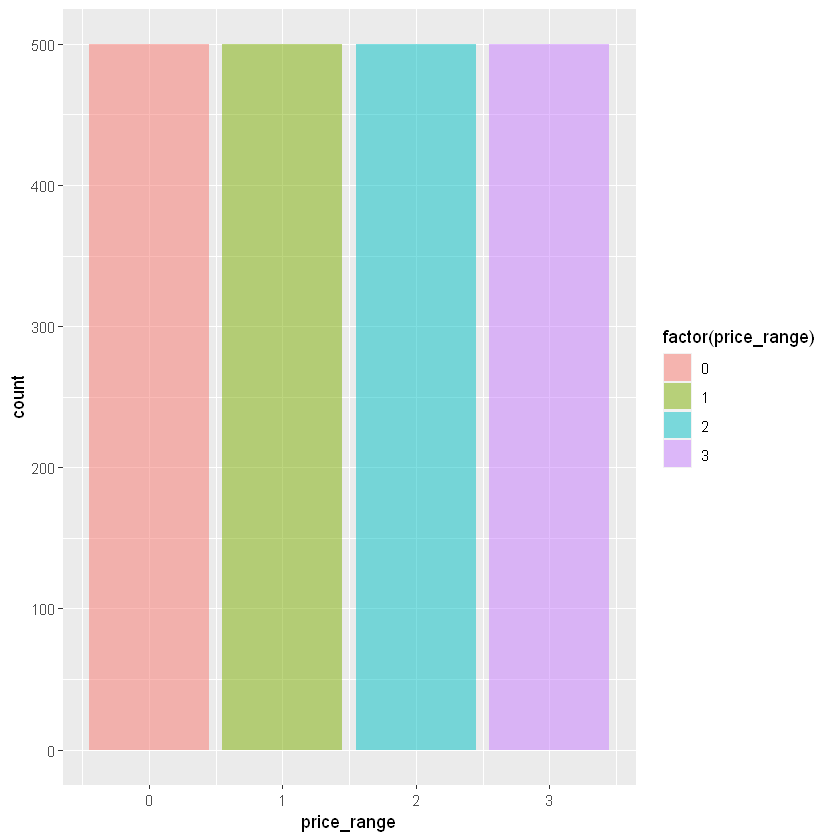

In [5]:
library(ggplot2)
ggplot(df,aes(price_range)) + geom_bar(aes(fill=factor(price_range)),alpha=0.5)

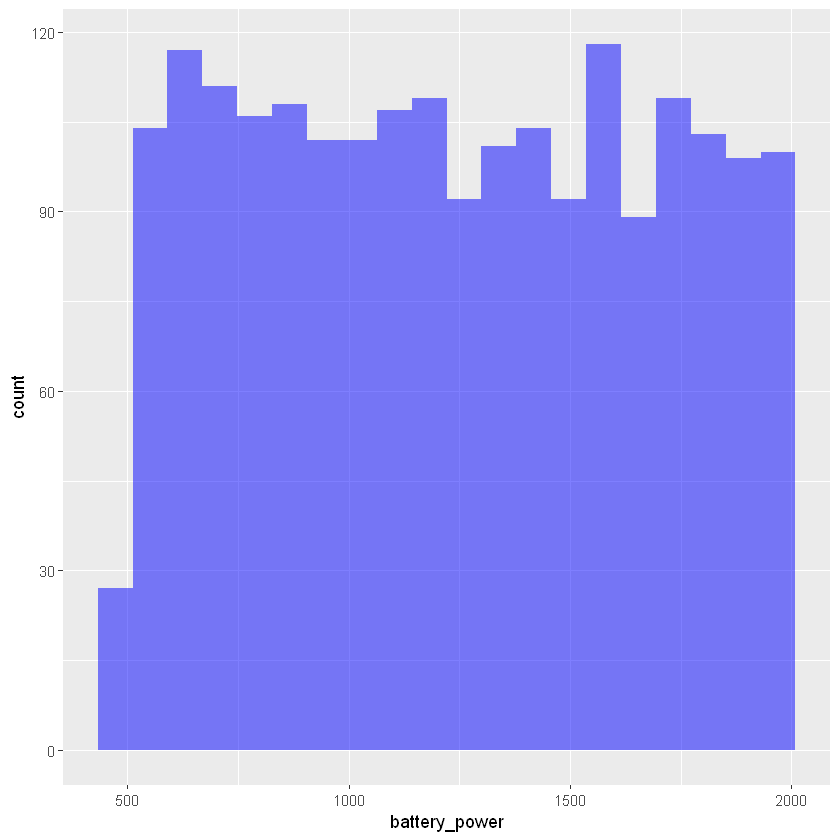

In [6]:
ggplot(df,aes(battery_power)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

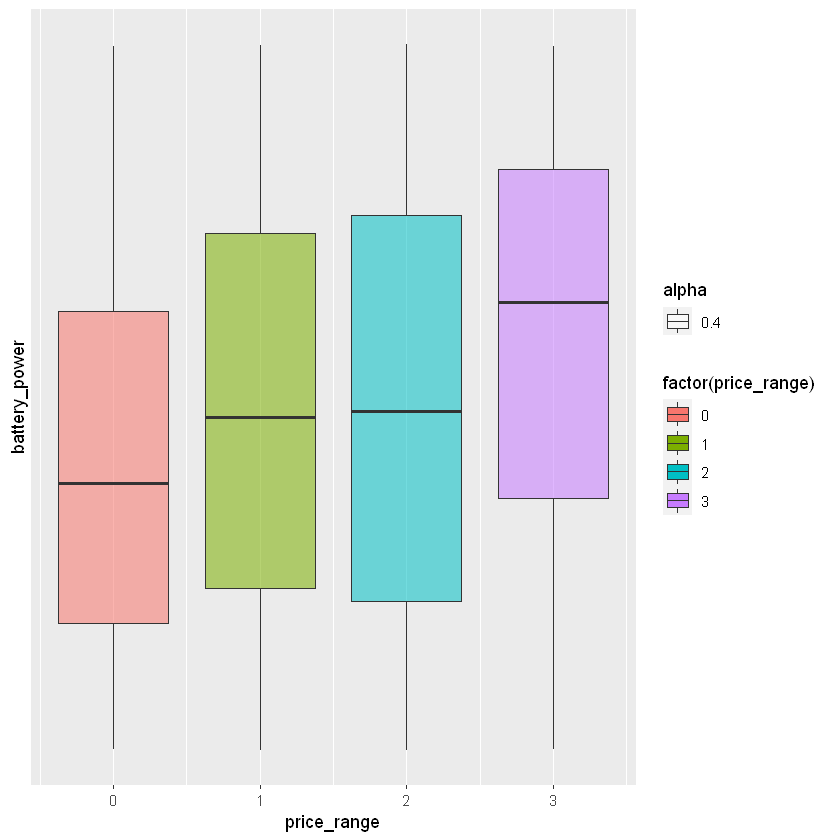

In [7]:
pl <- ggplot(df,aes(price_range, battery_power)) + geom_boxplot(aes(group=price_range,fill=factor(price_range),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

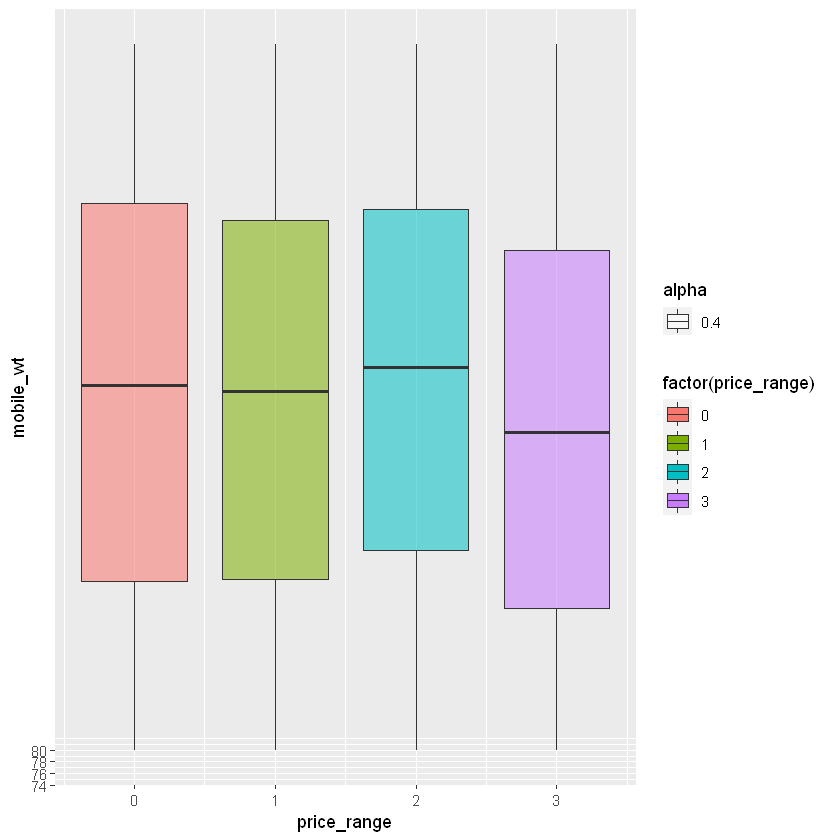

In [8]:
pl <- ggplot(df,aes(price_range, mobile_wt)) + geom_boxplot(aes(group=price_range,fill=factor(price_range),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [9]:
library(caTools)
set.seed(101)

split = sample.split(df$price_range, SplitRatio = 0.70)

train = subset(df, split == TRUE)
test = subset(df, split == FALSE)

In [10]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




In [11]:
model <- randomForest(price_range ~ .,   data=df)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


In [12]:
print(model)


Call:
 randomForest(formula = price_range ~ ., data = df) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 0.08969456
                    % Var explained: 92.82


In [13]:
importance(model)

IncNodePurity
battery_power  139.043143  
blue             3.811579  
clock_speed     20.577667  
dual_sim         3.296391  
fc              17.279184  
four_g           3.082913  
int_memory      27.271625  
m_dep           15.614026  
mobile_wt       32.954023  
n_cores         15.120541  
pc              21.226996  
px_height       83.525890  
px_width        84.645666  
ram           1928.165840  
sc_h            18.828279  
sc_w            23.411620  
talk_time       20.320433  
three_g          3.027643  
touch_screen     3.520075  
wifi             2.961066

In [14]:
pred = predict(model, test)

In [15]:
pred = round(pred)

In [16]:
misClasificError <- mean(pred != test$price_range)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 1"


In [17]:
table(test$price_range, pred)

   pred
      0   1   2   3
  0 150   0   0   0
  1   0 150   0   0
  2   0   0 150   0
  3   0   0   0 150